In [65]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

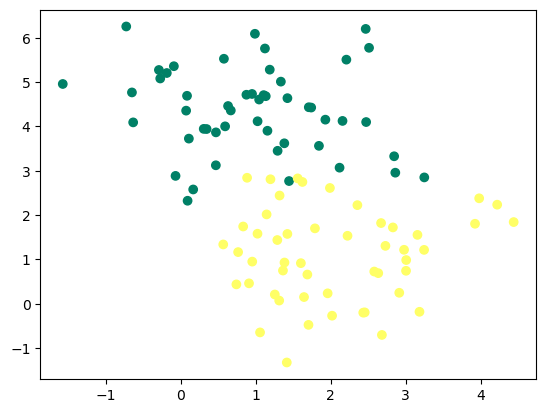

In [66]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [78]:
def initialisation(X):
    """
    Initialise les poids et le biais de manière aléatoire.

    Arguments :
    X -- Matrice des features (m, n_x)

    Retourne :
    w -- Vecteur de poids de forme (n_x, 1)
    b -- Biais, un scalaire
    """
    w = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return w, b

def model(X, w, b):
    """
    Calcule la sortie de l'unité neuronale.

    Arguments :
    X -- Matrice des features (m, n_x)
    w -- Vecteur de poids de forme (n_x, 1)
    b -- Biais, un scalaire

    Retourne :
    A -- Prédiction, un vecteur de forme (m, 1)
    """
    Z = np.dot(X, w) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def log_loss(A, y):
    """
    Calcule la perte logistique.

    Arguments :
    A -- Prédiction, un vecteur de forme (m, 1)
    y -- Valeurs réelles, un vecteur de forme (m, 1)

    Retourne :
    loss -- Perte logistique moyenne
    """
    loss = 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
    return loss

def gradients(A, X, y):
    """
    Calcule les gradients pour les poids et le biais.

    Arguments :
    A -- Prédiction, un vecteur de forme (m, 1)
    X -- Matrice des features (m, n_x)
    y -- Valeurs réelles, un vecteur de forme (m, 1)

    Retourne :
    dw -- Gradients par rapport aux poids, un vecteur de forme (n_x, 1)
    db -- Gradients par rapport au biais, un scalaire
    """
    dw = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return dw, db

def update(dw, db, w, b, learning_rate):
    """
    Met à jour les poids et le biais selon les gradients.

    Arguments :
    dw -- Gradients par rapport aux poids, un vecteur de forme (n_x, 1)
    db -- Gradients par rapport au biais, un scalaire
    w -- Vecteur de poids de forme (n_x, 1)
    b -- Biais, un scalaire
    learning_rate -- Taux d'apprentissage

    Retourne :
    w -- Vecteur de poids mis à jour
    b -- Biais mis à jour
    """
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

def predict(X, w, b):
    """
    Prédit les étiquettes pour les données d'entrée X.

    Arguments :
    X -- Matrice des features (m, n_x)
    w -- Vecteur de poids de forme (n_x, 1)
    b -- Biais, un scalaire

    Retourne :
    A -- Prédiction, un vecteur de forme (m, 1)
    """
    A = model(X, w, b)
    return A >= 0.5

def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    """
    Entraîne l'unité neuronale artificielle.

    Arguments :
    X -- Matrice des features (m, n_x)
    y -- Valeurs réelles, un vecteur de forme (m, 1)
    learning_rate -- Taux d'apprentissage
    n_iter -- Nombre d'itérations

    Retourne :
    w -- Vecteur de poids entraîné
    b -- Biais entraîné
    """
    w, b = initialisation(X)
    Loss = []
    for i in range(n_iter):
        A = model(X, w, b)
        Loss.append(log_loss(A, y))
        dw, db = gradients(A, X, y)
        w, b = update(dw, db, w, b, learning_rate)
        
    y_pred = predict(X, w, b)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy:", accuracy)
    plt.plot(Loss)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Evolution de la perte au fil des itérations')
    plt.show()
    return w, b


0.92


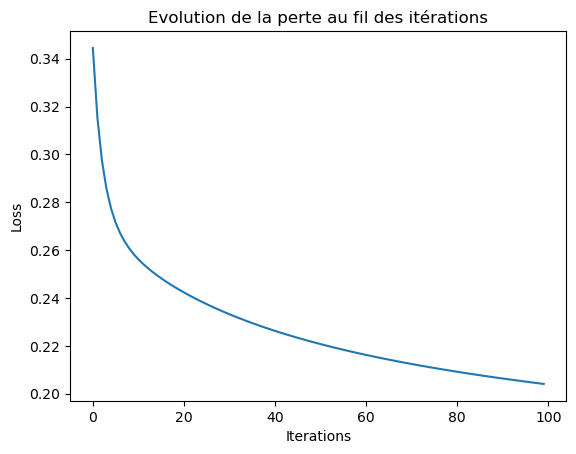

In [79]:
w,b=artificial_neuron(X,y)

In [70]:
w  


array([[ 1.31864079],
       [-0.90226489]])

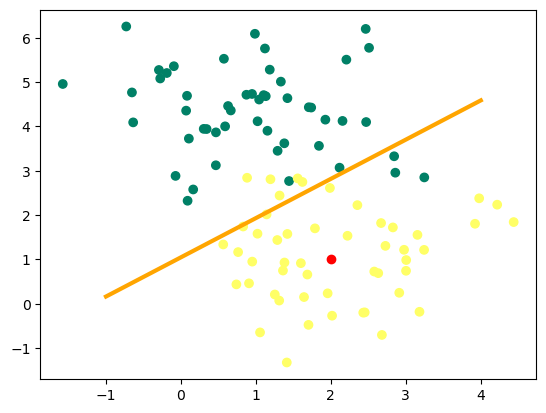

array([ True])

In [80]:
new_plant = np.array([2,1])
x0 = np.linspace(-1,4,100)
x1 = (-w[0] * x0 - b) /w[1]
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(new_plant[0],new_plant[1],c='r')
plt.plot(x0,x1,c='orange',lw=3)
plt.show()
predict(new_plant,w,b)